In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

# Set up the Titanic train csv file as a DataFrame
path = 'https://raw.githubusercontent.com/chirayukong/infsci2725-spring-2018/master/lecture-06/'
train_df = pd.read_csv(path + 'train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# We could also get overall info for the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

1.) Who were the passengers on the Titanic? (Ages, Gender, Class,..etc)

2.) What deck were the passengers on and how does that relate to their class?

3.) Where did the passengers come from?

4.) Who was alone and who was with family?

Then we'll dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?

So let's start with the first question: Who were the passengers on the titanic?

# 1) Who were the passengers on the Titanic? (Ages, Gender, Class,..etc)
## 1.1) Gender

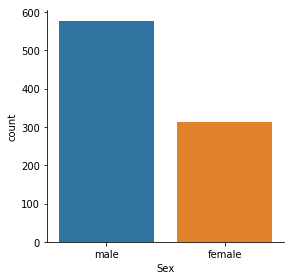

In [4]:
_ = sns.factorplot('Sex', data=train_df, kind="count")

## 1.2) Classes

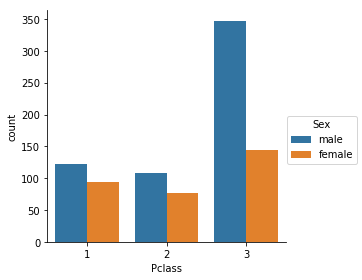

In [5]:
# Separate the classes by genders. We can use the 'hue' argument here!
_ = sns.factorplot('Pclass', data=train_df, hue='Sex', kind="count")

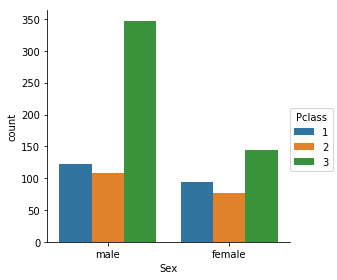

In [6]:
# Separate the genders by classes. 
_ = sns.factorplot('Sex', data=train_df, hue='Pclass', kind="count")

## 1.3) Ages

In [7]:
# Treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column


# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
train_df['person'] = train_df[['Age', 'Sex']].apply(male_female_child, axis=1)
# Check out the first ten rows.
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


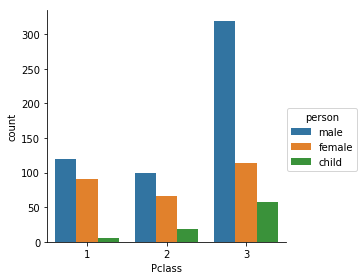

In [8]:
# Do factorplot again!
_ = sns.factorplot('Pclass', data=train_df, hue='person', kind="count")

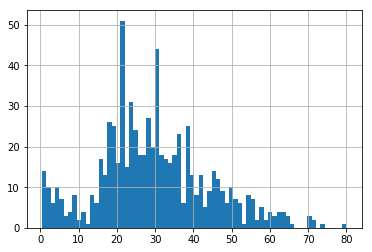

In [9]:
# Use Pandas to create a quick histogram
_ = train_df['Age'].hist(bins=70)

In [10]:
# Also get a quick overall comparison of male,female,child
train_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

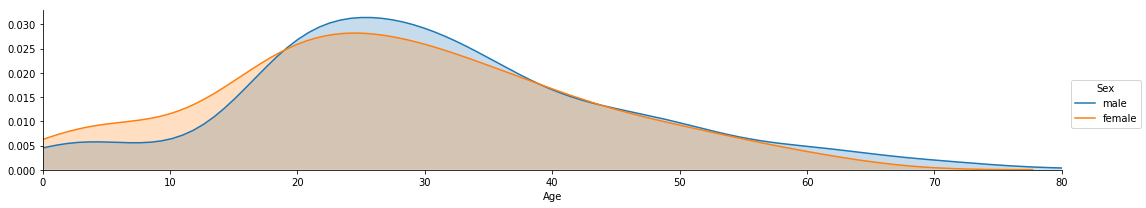

In [11]:
# Another way to visualize the ages is to use FacetGrid to plot multiple kdeplot:s on one chart.

# Set the figure equal to a FacetGrid with the Pandas DataFrame as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(train_df, hue="Sex", aspect=5)

# Next use map to plot all the possible kdeplot:s for the 'Age' column by the hue choice.
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger.
oldest = train_df['Age'].max()

# Since we know no one can be negative years old set the x lower limit at 0.
fig.set(xlim=(0,oldest))

# Finally add a legend.
fig.add_legend()


# Put the above code into function for reuse later.
def draw_kde_plots(fig):
    fig.map(sns.kdeplot, 'Age', shade=True)
    oldest = train_df['Age'].max()
    fig.set(xlim=(0, oldest))
    fig.add_legend()

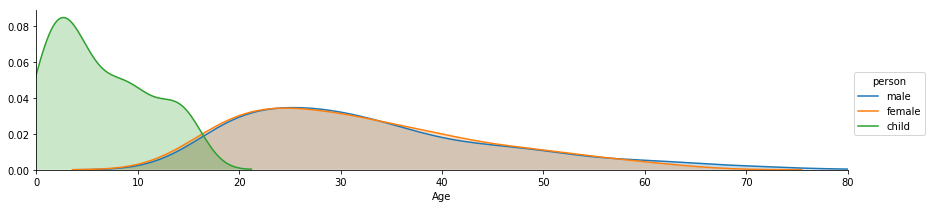

In [12]:
# Do the same thing for the 'person' column to include children:
draw_kde_plots(sns.FacetGrid(train_df, hue="person", aspect=4))

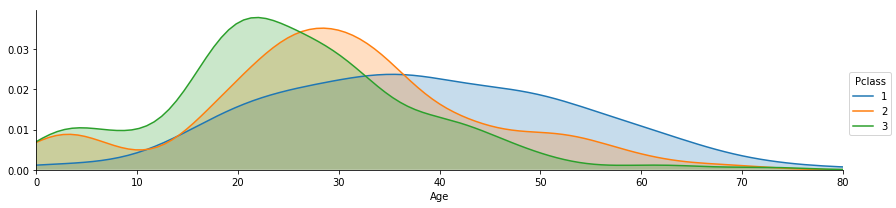

In [13]:
# Do the same for class by changing the hue argument:
draw_kde_plots(sns.FacetGrid(train_df, hue="Pclass", aspect=4))


# 2) What deck were the passengers on and how does that relate to their class?


In [14]:
# We've gotten a pretty good picture of who the passengers were based on Sex, Age, and Class. 
# So let's move on to the next question. Look at our dataset again.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [15]:
# First, drop the NaN values and create a new object, cabin
cabin_df = train_df['Cabin'].dropna()
# Preview of the cabin
cabin_df.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

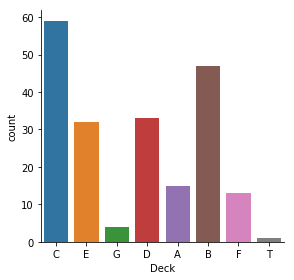

In [16]:
# So let's grab deck which is the letter for the cabin with list comprehension.
decks = [cabin[0] for cabin in cabin_df]

# Reset DataFrame and use factor plot
deck_df = pd.DataFrame(decks)
deck_df.columns = ['Deck']
_ = sns.factorplot('Deck', data=deck_df, kind="count")

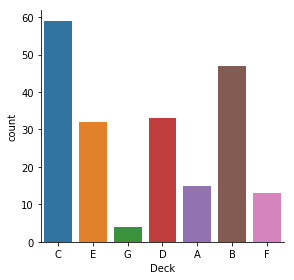

In [17]:
# Filter out all rows with the 'T' value.
deck_df = deck_df[deck_df.Deck != 'T']
# Replot
#_ = sns.factorplot('Deck',data=deck_df,palette='cool',kind="count")
_ = sns.factorplot('Deck',data=deck_df,kind="count")

# 3) Where did the passengers come from?


In [18]:
# Take another look at our original data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

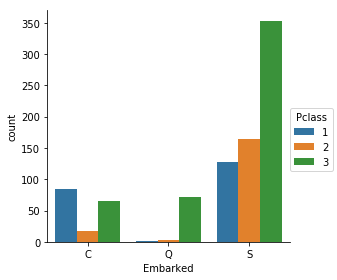

In [19]:
# Now we can make a quick factorplot to check out the results, note the order argument is used for dealing with NaN values
_ = sns.factorplot('Embarked', data=train_df, hue='Pclass', order=['C', 'Q', 'S'], kind="count")

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

# 4) Who was alone and who was with family?

In [20]:
# Start by adding a new column to define alone

# Add the parent/child column with the sibsp column
train_df['Company'] = train_df.Parch + train_df.SibSp
train_df['Company'].head(20)

0     1
1     1
2     0
3     1
4     0
5     0
6     0
7     4
8     2
9     1
10    2
11    0
12    0
13    6
14    0
15    0
16    5
17    0
18    1
19    0
Name: Company, dtype: int64

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [21]:
# Look for > 0 or == 0 to set alone status
train_df['Alone'] = train_df['Company'] == 0
train_df['Alone'].head(20)

0     False
1     False
2      True
3     False
4      True
5      True
6      True
7     False
8     False
9     False
10    False
11     True
12     True
13    False
14     True
15     True
16    False
17     True
18    False
19     True
Name: Alone, dtype: bool

In [22]:
# Make sure it worked
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Company,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,True


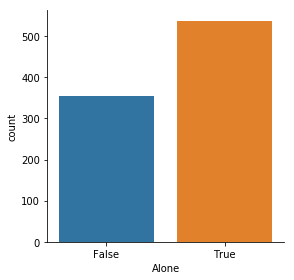

In [23]:
# Now get a simple visualization!
_ = sns.factorplot('Alone', data=train_df, kind="count")

Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: What factors helped someone survive the sinking?

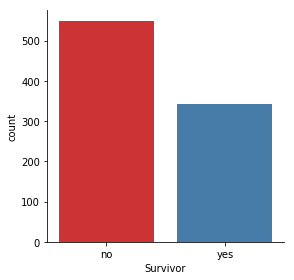

In [24]:
# Create a new column for legibility purposes through mapping.
train_df["Survivor"] = train_df.Survived.map({0: "no", 1: "yes"})

# Just get a quick overall view of survived vs died. 
_ = sns.factorplot('Survivor', data=train_df, palette='Set1', kind="count")

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

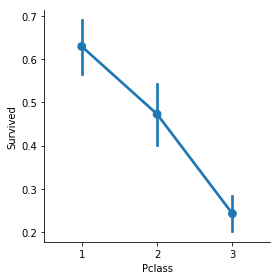

In [25]:
# Use a factorplot again, but now considering class.
_ = sns.factorplot('Pclass','Survived', data=train_df)

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

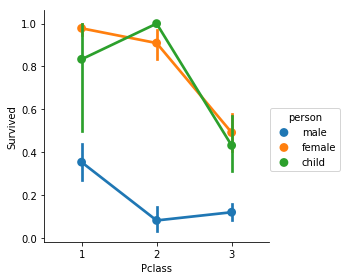

In [26]:
# Now consider class and gender.
_ = sns.factorplot('Pclass','Survived', hue='person', data=train_df)

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

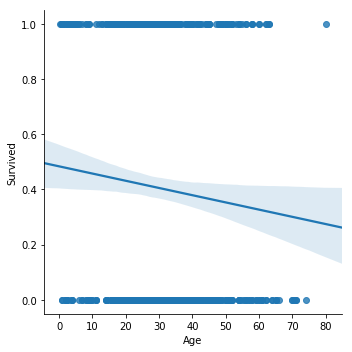

In [27]:
# Use a linear plot on age versus survival.
_ = sns.lmplot('Age','Survived', data=train_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived. Let's go ahead and use hue to take a look at the effect of class and age.

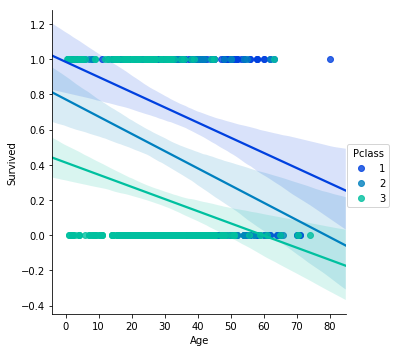

In [28]:
# Use a linear plot on age versus survival using hue for class separation
_ = sns.lmplot('Age','Survived', hue='Pclass', data=train_df, palette='winter')

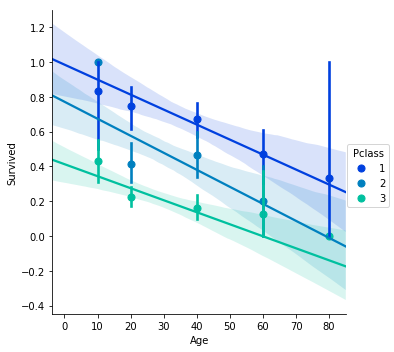

In [29]:
# Use a linear plot on age versus survival using hue for class separation
generations=[10,20,40,60,80]
_ = sns.lmplot('Age','Survived', hue='Pclass', data=train_df, palette='winter', x_bins=generations)

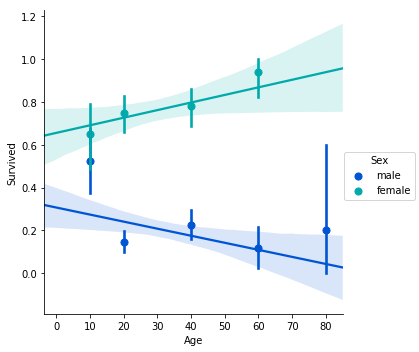

In [30]:
_ = sns.lmplot('Age','Survived', hue='Sex', data=train_df, palette='winter', x_bins=generations)

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?


2.) Did having a family member increase the odds of surviving the crash?



In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Company,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,False,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,False,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,True,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,False,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,True,no


In [32]:
deck_df.info()
deck_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 203
Data columns (total 1 columns):
Deck    203 non-null object
dtypes: object(1)
memory usage: 13.2+ KB


,Deck
0,C
1,C
2,E
3,G
4,C


In [33]:
cleaned_df = train_df[train_df.Cabin.notnull()]
cleaned_df.info()
cleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 889
Data columns (total 16 columns):
PassengerId    204 non-null int64
Survived       204 non-null int64
Pclass         204 non-null int64
Name           204 non-null object
Sex            204 non-null object
Age            185 non-null float64
SibSp          204 non-null int64
Parch          204 non-null int64
Ticket         204 non-null object
Fare           204 non-null float64
Cabin          204 non-null object
Embarked       202 non-null object
person         204 non-null object
Company        204 non-null int64
Alone          204 non-null bool
Survivor       204 non-null object
dtypes: bool(1), float64(2), int64(6), object(7)
memory usage: 25.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Company,Alone,Survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,False,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,False,yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0,True,no
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,2,False,yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,0,True,yes


In [34]:
# First, drop the NaN values and create a new data frame.
# cleaned_df['level'] = cleaned_df[['Cabin']].apply(lambda x: x[0][0], axis=1)
cleaned_df["level"] = cleaned_df['Cabin'].map(lambda c: c[0]) # SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.

cleaned_df.head()

/Users/sahawut/pyenvs/da'18-1/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Company,Alone,Survivor,level
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,False,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,False,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0,True,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,2,False,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,0,True,yes,C


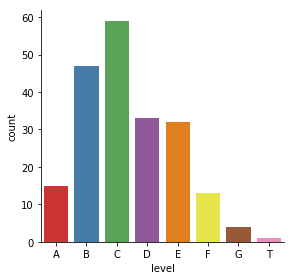

In [35]:
_ = sns.factorplot('level', data=cleaned_df, palette='Set1', kind="count", order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

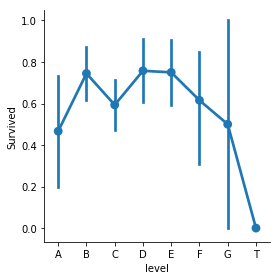

In [36]:
# Use a factor plot again, but now considering level.
_ = sns.factorplot('level','Survived', order=['A','B','C','D','E','F','G','T'], data=cleaned_df)

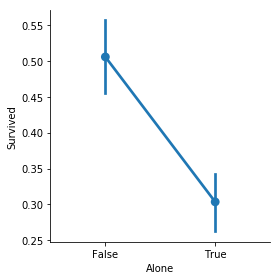

In [37]:
# Use a factor plot again, but now considering alone.
_ = sns.factorplot('Alone','Survived', data=train_df)

In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Company,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1,False,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1,False,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,True,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1,False,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0,True,no


# Examples of Submissions
## load inputs (training set and test set)

In [39]:
def transform(df):
    df['SexId'] = df['Sex'].map({'male': 1, 'female': 0})
    df['EmbarkedId'] = df['Embarked'].fillna('N').map(lambda c: ord(c[0]))
    return df


train = transform(pd.read_csv(path +'train.csv'))
test_df = transform(pd.read_csv(path + 'test.csv'))

In [40]:
features = ['Pclass', 'SibSp',  'Parch', 'SexId', 'EmbarkedId']
X_train = train[features]
y_train = train['Survived']
X_test = test_df[features]

inputs = X_train, y_train, X_test

## Model Selection

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


def models():
    return [LogisticRegression(),
            SVC(),
            LinearSVC(),
            RandomForestClassifier(),
            KNeighborsClassifier(),
            GaussianNB(),
            DecisionTreeClassifier()]

In [42]:
def name(model):
    return model.__class__.__name__


def best_model(model2predict):
    score_df = series_best_first(model2predict)
    print(score_df)
    return score_df.keys()[0]


def series_best_first(model2predict):
    model2score = {k: v[1] for k, v in model2predict.items()}
    return pd.Series(model2score).sort_values(ascending=False)


def write_submission(predict, submission_csv):
    submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": predict
    })
    submission.to_csv(submission_csv, index=False)
    return pd.read_csv(submission_csv).tail(10)

### Model Selection based on the `score` method

In [43]:
def predict_and_score(model, inputs):
    X, y, X_test = inputs
    model.fit(X, y)
    y_pred = model.predict(X_test)
    return y_pred, model.score(X, y)


table = {name(m): predict_and_score(m, inputs) for m in models()}
model = best_model(table)
write_submission(table[model][0], 'submission.csv')

DecisionTreeClassifier    0.837262
RandomForestClassifier    0.833895
KNeighborsClassifier      0.820426
SVC                       0.814815
LogisticRegression        0.800224
GaussianNB                0.784512
LinearSVC                 0.751964
dtype: float64


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,0
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


### Model Selection based on the `cross_val_score` function


In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
def predict_and_cv_score(model, inputs):
    X, y, X_test = inputs
    score = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    model.fit(X, y)
    return model.predict(X_test), score


table = {name(m): predict_and_cv_score(m, inputs) for m in models()}
model = best_model(table)
write_submission(table[model][0], 'submission_sv.csv')


KNeighborsClassifier      0.811482
SVC                       0.805863
DecisionTreeClassifier    0.799120
LogisticRegression        0.796836
RandomForestClassifier    0.795775
GaussianNB                0.778984
LinearSVC                 0.743053
dtype: float64


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


### Improve prediction by voting

In [46]:
model2predict = {name(m): predict_and_score(m, inputs) for m in models()}
series = series_best_first(model2predict)
print(series)
best_models = series.keys()[0:5].tolist()
print(best_models)
ys = [v[0] for k, v in model2predict.items() if k in best_models]
sum_ys = np.sum(ys, axis=0)
# print(sum_ys)
votes = sum_ys // 3
# print(votes)

write_submission(votes, 'submission_vote.csv')

RandomForestClassifier    0.837262
DecisionTreeClassifier    0.837262
KNeighborsClassifier      0.820426
SVC                       0.814815
LogisticRegression        0.800224
LinearSVC                 0.800224
GaussianNB                0.784512
dtype: float64
['RandomForestClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC', 'LogisticRegression']


,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,1
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


### Improve prediction by parameter tuning
#### KNN example

In [47]:
from sklearn.model_selection import train_test_split

train = transform(pd.read_csv(path + 'train.csv'))
test_df = transform(pd.read_csv(path + 'test.csv'))
X = train[features]
y = train['Survived']
X_test = test_df[features]


X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X, y, random_state=6)

In [48]:
# k = 5 (default) for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_cv_train, y_cv_train, cv=10, scoring='accuracy')
scores

array([0.76470588, 0.74626866, 0.7761194 , 0.70149254, 0.80597015,
       0.79104478, 0.68656716, 0.8030303 , 0.66666667, 0.84848485])

In [49]:
scores.mean()

0.7590350387101924

In [50]:
k_range = range(1, 31)

k_cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_cv_train, y_cv_train, cv=10, scoring='accuracy')
    k_cv_scores.append(scores.mean())
    
k_cv_scores

[0.6615392289887462,
 0.7352635219623805,
 0.726127384468034,
 0.7666074706680501,
 0.7590350387101924,
 0.7740721526059542,
 0.7605262457764652,
 0.7666533641950675,
 0.7634907015723521,
 0.7665429536807938,
 0.7710205656210924,
 0.7800203527815468,
 0.7634900364487722,
 0.7830519860590097,
 0.774006970495118,
 0.7904707744698964,
 0.7784174049538406,
 0.7948579296033202,
 0.7890208050655813,
 0.7919174182563121,
 0.7903796525394419,
 0.7875276026285685,
 0.7889981908638626,
 0.7829402452975763,
 0.788954957831165,
 0.7800203527815468,
 0.7814463777369836,
 0.7770126639529624,
 0.7695938755420757,
 0.7650710351983399]

In [51]:
print('Length of list', len(k_cv_scores))
print('Max of list', max(k_cv_scores))

Length of list 30
Max of list 0.7948579296033202


In [52]:
from sklearn import metrics

k_test_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_cv_train, y_cv_train)
    y_pred = knn.predict(X_cv_test)
    k_test_scores.append(metrics.accuracy_score(y_cv_test, y_pred))

Test: K= 17
CV K= 18


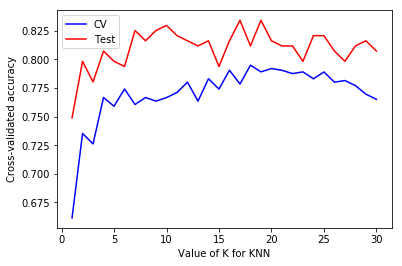

In [53]:
plt.plot(k_range, k_cv_scores, color='b', label='CV')
plt.plot(k_range, k_test_scores, color='r', label = 'Test')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.legend()
k_test_best = np.argmax(k_test_scores) + 1
print('Test: K=', k_test_best)
k_cv_best = np.argmax(k_cv_scores) + 1
print('CV K=', k_cv_best)

In [54]:
knn_cv = KNeighborsClassifier(n_neighbors=k_cv_best)
knn_cv.fit(X_train, y_train)
y_cv_pred = knn_cv.predict(X_test)
write_submission(y_cv_pred, 'submission_knn_cv.csv')

,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,0
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [55]:
knn_test = KNeighborsClassifier(n_neighbors=k_test_best)
knn_test.fit(X_train, y_train)
y_test_pred = knn_test.predict(X_test)
write_submission(y_test_pred, 'submission_knn_test.csv')

,PassengerId,Survived
408,1300,1
409,1301,1
410,1302,1
411,1303,1
412,1304,0
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
